In [16]:
%matplotlib inline
from __future__ import print_function
from scipy.stats import linregress

import numpy as np
import matplotlib.pylab as plt
import operator as op

import json

def xvals(v): return [e[0] for e in v]
def yvals(v): return [e[1] for e in v]

In [3]:
# Load data
summaries = []
with open("results-n16k-d5.txt", "r") as fp:
    summaries.extend([json.loads(line) for line in fp])
with open("results-n32k-d5.txt", "r") as fp:
    summaries.extend([json.loads(line) for line in fp])

In [7]:
# accumulate results by key (n, d, a, b)
results = {}
for summary in summaries:
    if not summary["converged"]:
        print("warn: did not converge")
    d = int(np.round((summary["a"] + summary["b"])/2.0))
    key = (summary["n"], d, summary["a"], summary["b"])
    acc = results.get(key, [])
    acc.append(summary)
    results[key] = acc

In [9]:
# sanity check
total = 0
for key, value in results.iteritems():
    nsamples = len(value)
    n = key[0]
    print(key, nsamples, nsamples * n)
    total += nsamples
print("total", total)

(16000, 5, 7.23606797749979, 2.76393202250021) 40000 640000000
(32000, 5, 7.23606797749979, 2.76393202250021) 20000 640000000
(16000, 5, 7.303150016824784, 2.6968499831752166) 40000 640000000
(16000, 5, 7.247248317387289, 2.7527516826127116) 40000 640000000
(32000, 5, 7.247248317387289, 2.7527516826127116) 20000 640000000
(32000, 5, 7.269608997162287, 2.7303910028377136) 20000 640000000
(32000, 5, 7.258428657274788, 2.741571342725212) 20000 640000000
(32000, 5, 7.280789337049786, 2.719210662950214) 20000 640000000
(16000, 5, 7.269608997162287, 2.7303910028377136) 40000 640000000
(32000, 5, 7.303150016824784, 2.6968499831752166) 20000 640000000
(16000, 5, 7.291969676937285, 2.7080303230627156) 40000 640000000
(16000, 5, 7.280789337049786, 2.719210662950214) 40000 640000000
(32000, 5, 7.291969676937285, 2.7080303230627156) 20000 640000000
(16000, 5, 7.258428657274788, 2.741571342725212) 40000 640000000
total 420000


In [11]:
def getdata():
    for key, value in results.iteritems():
        qvals = np.array([v["correlation"]for v in value])
        top = (qvals ** 4).mean()
        bot = ((qvals ** 2).mean()) ** 2
        binder = top / bot
        n, d, a, b = key
        lam = (a-b)/np.sqrt(2.0*(a+b))
        yield n, d, lam, binder
data = list(getdata())

In [12]:
data

[(16000, 5, 1.0, 1.9885503622696987),
 (32000, 5, 1.0, 2.0453961227343989),
 (16000, 5, 1.0300000000000002, 1.5839491177152698),
 (16000, 5, 1.0050000000000001, 1.9140431861920915),
 (32000, 5, 1.0050000000000001, 1.9644751494913972),
 (32000, 5, 1.0150000000000001, 1.7709710338553637),
 (32000, 5, 1.01, 1.8680952410452278),
 (32000, 5, 1.02, 1.7082740759199568),
 (16000, 5, 1.0150000000000001, 1.7812023980492593),
 (32000, 5, 1.0300000000000002, 1.5213918865685496),
 (16000, 5, 1.0250000000000001, 1.6455385123092818),
 (16000, 5, 1.02, 1.7122404427733928),
 (32000, 5, 1.0250000000000001, 1.6064759602148235),
 (16000, 5, 1.01, 1.8437905135221022)]

In [14]:
line_n32k_d5 = sorted([(v[2], v[3]) for v in data if v[0] == 32000], key=op.itemgetter(0))
line_n16k_d5 = sorted([(v[2], v[3]) for v in data if v[0] == 16000], key=op.itemgetter(0))

In [29]:
m1, b1, _, _, _ = linregress(xvals(line_n16k_d5), yvals(line_n16k_d5))
m2, b2, _, _, _ = linregress(xvals(line_n32k_d5), yvals(line_n32k_d5))
xcross = (b2-b1)/(m1-m2)

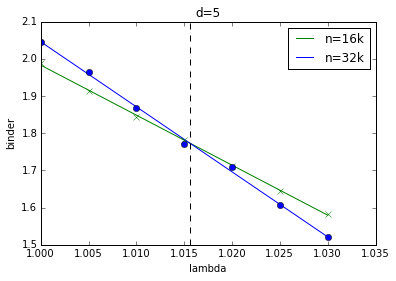

In [35]:
xaxis = np.linspace(np.min(xvals(line_n16k_d5)), np.max(xvals(line_n16k_d5)), 100)
plt.plot(xaxis, m1*xaxis + b1, 'g',
         xaxis, m2*xaxis + b2, 'b')
plt.legend(["n=16k", "n=32k"])
plt.plot(xvals(line_n16k_d5), yvals(line_n16k_d5), 'gx',
         xvals(line_n32k_d5), yvals(line_n32k_d5), 'bo')
plt.axvline(xcross, color='k', linestyle='--')
plt.xlabel("lambda")
plt.ylabel("binder")
plt.title("d=5")

In [36]:
print(xcross)

1.01555758792
